In [1]:
# Initial imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initialize RandomState for reproducibility
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]

In [5]:
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)
closing_prices_df = get_historical_data(list_of_tickers, start_date, end_date, output_format = 'pandas')

In [6]:
closing_prices_df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-08-05  288.09  288.21  281.72  283.82  178745449  112.28  112.58  112.25   
2019-08-06  285.91  288.04  284.28  287.80  120711682  112.47  112.76  112.40   
2019-08-07  284.40  288.82  282.04  287.97  140572265  113.17  113.29  112.61   
2019-08-08  289.62  293.62  289.01  293.62   87713904  112.51  112.82  112.33   
2019-08-09  292.58  293.24  289.65  291.62   93729958  112.86  112.95  112.58   

                             
             close   volume  
date                         
2019-08-05  112.44  7626602  
2019-08-06  112.74  5151810  
2019-08-07  112.68  9156551  
2019-08-08  112.79  3707196  
2019-08-09  112.64  2432292

In [7]:
# Save DataFrame into a pickle file to avoid calling the API again, burning limited resources. 
closing_prices_df.to_pickle("historical_closing_prices.pickle")

In [8]:
historical_data_df = pd.read_pickle("historical_closing_prices.pickle")

In [9]:
historical_data_df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-08-05  288.09  288.21  281.72  283.82  178745449  112.28  112.58  112.25   
2019-08-06  285.91  288.04  284.28  287.80  120711682  112.47  112.76  112.40   
2019-08-07  284.40  288.82  282.04  287.97  140572265  113.17  113.29  112.61   
2019-08-08  289.62  293.62  289.01  293.62   87713904  112.51  112.82  112.33   
2019-08-09  292.58  293.24  289.65  291.62   93729958  112.86  112.95  112.58   

                             
             close   volume  
date                         
2019-08-05  112.44  7626602  
2019-08-06  112.74  5151810  
2019-08-07  112.68  9156551  
2019-08-08  112.79  3707196  
2019-08-09  112.64  2432292

In [10]:
# We only need the closing prices for further analysis
historical_data_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
historical_data_df.head()

,SPY,AGG
,close,close
date,,
2019-08-05,283.82,112.44
2019-08-06,287.80,112.74
2019-08-07,287.97,112.68
2019-08-08,293.62,112.79
2019-08-09,291.62,112.64


In [11]:
# check to see if the index is in datetime format
historical_data_df.index[:3]

DatetimeIndex(['2019-08-05', '2019-08-06', '2019-08-07'], dtype='datetime64[ns]', name='date', freq=None)

In [12]:
# Check columns are in the correct format to do our calculations
historical_data_df.dtypes

SPY  close    float64
AGG  close    float64
dtype: object

In [13]:
# Check for Null Values
historical_data_df.isnull().sum()

SPY  close    0
AGG  close    0
dtype: int64

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [14]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = historical_data_df.pct_change().dropna()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2019-08-06,0.014023,0.002668
2019-08-07,0.000591,-0.000532
2019-08-08,0.019620,0.000976
2019-08-09,-0.006812,-0.001330
2019-08-12,-0.012173,0.003640


In [15]:
# Calculate average daily returns
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
print(f"SPY average daily return is: {avg_daily_return_spy}")
print(f"AGG average daily return is: {avg_daily_return_agg}")

SPY average daily return is: 0.0007967474925861806
AGG average daily return is: 0.00025293813767773664


In [16]:
# Calculate volatility
volatility_return_spy = daily_returns.std()['SPY']['close']
volatility_return_agg = daily_returns.std()['AGG']['close']
print(f"SPY volatility is: {volatility_return_spy}")
print(f"AGG volatility is: {volatility_return_agg }")

SPY volatility is: 0.02057350569989409
AGG volatility is: 0.005383499826902219


In [17]:
historical_data_df.tail(1)

,SPY,AGG
,close,close
date,,
2020-08-03,328.79,119.4


In [18]:
# Save the last day's closing price
spy_last_closing_price = historical_data_df['SPY','close'][-1]
print("SPY last day's closing price is: {}".format(spy_last_closing_price ))

SPY last day's closing price is: 328.79


In [19]:
agg_last_closing_price = historical_data_df['AGG','close'][-1]
print("AGG last day's closing price is: {}".format(agg_last_closing_price))

AGG last day's closing price is: 119.4


In [20]:
# Setup the Monte Carlo Parameters

number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

for x in range(number_simulations):
    # YOUR CODE HERE
    spy_simulated_price_list = [spy_last_closing_price]
    agg_simulated_price_list = [agg_last_closing_price]
    
    spy_randoms = np.random.normal(avg_daily_return_spy, volatility_return_spy, number_records)
    agg_randoms = np.random.normal(avg_daily_return_agg, volatility_return_agg, number_records)
    
    for i in range(number_records):
        # Calculate the simulated price using the last prices within the list
    
        spy_simulated_price_result = spy_simulated_price_list[-1] * (1+spy_randoms[i])
        agg_simulated_price_result = agg_simulated_price_list[-1] * (1+agg_randoms[i])
        
        spy_simulated_price_list.append(spy_simulated_price_result)
        agg_simulated_price_list.append(agg_simulated_price_result)
        
    monte_carlo["SPY Prices "] = pd.Series(spy_simulated_price_list)
    monte_carlo["AGG Prices"] = pd.Series(agg_simulated_price_list)
    
    simulated_daily_returns = monte_carlo.pct_change().dropna()
    
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns).cumprod()

In [21]:
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,1.003410,0.985861,0.981654,0.992677,1.009421,1.019768,1.024372,0.982571,1.002319,0.998737,...,1.002564,0.990836,1.020198,0.996585,0.994111,1.006040,0.990005,0.979434,1.010424,1.000214
2,0.999840,0.985616,0.979339,1.006274,1.038616,1.000059,1.011158,1.018917,1.000497,0.987234,...,1.006232,0.971975,1.021620,1.005929,0.984558,1.014982,0.996884,0.999361,1.001726,0.985968
3,1.010507,0.992136,0.971332,1.004970,1.046611,0.977123,0.991293,0.992552,0.998589,1.010999,...,1.009678,0.988791,1.028678,1.008601,0.984808,1.012021,0.992660,0.999920,1.002343,0.997706
4,1.031989,1.000587,0.979289,0.981043,1.040288,0.979209,0.985229,0.980338,0.995786,1.001198,...,1.015902,0.987619,1.034438,1.014899,0.984566,0.977411,0.996012,0.991745,0.999661,1.004599
5,1.030411,0.999208,0.988792,0.967006,1.038357,0.990701,0.993158,0.964523,0.992646,1.015191,...,1.013584,0.996223,1.045326,1.011881,0.970083,0.972032,1.004087,1.007900,1.007005,1.000198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.379090,51.797352,12.832043,33.833280,133.764251,102.701848,19.976520,330.909481,40.822188,32.964386,...,18.867924,25.625784,31.293040,79.022980,81.299411,498.815973,23.181323,128.861034,25.543052,30.975390
7557,29.850376,52.022218,12.535587,34.271245,133.257070,103.766255,19.758983,332.132227,41.340455,32.767083,...,18.832248,25.383677,31.685877,79.645040,80.285566,500.741723,23.402403,130.038952,25.924995,31.507127
7558,29.830620,52.053245,12.141341,33.801298,132.107074,102.776112,19.474918,333.844216,40.599405,32.934130,...,18.816109,25.344156,31.420812,80.368843,81.142971,503.511366,23.545752,129.866851,25.612375,31.814029
7559,29.486002,51.489483,12.117245,34.035666,130.773785,103.784009,19.481055,335.589462,41.210384,32.795867,...,19.128393,25.388160,31.177980,80.983568,80.208079,500.585009,23.454436,129.710639,25.543893,32.246126


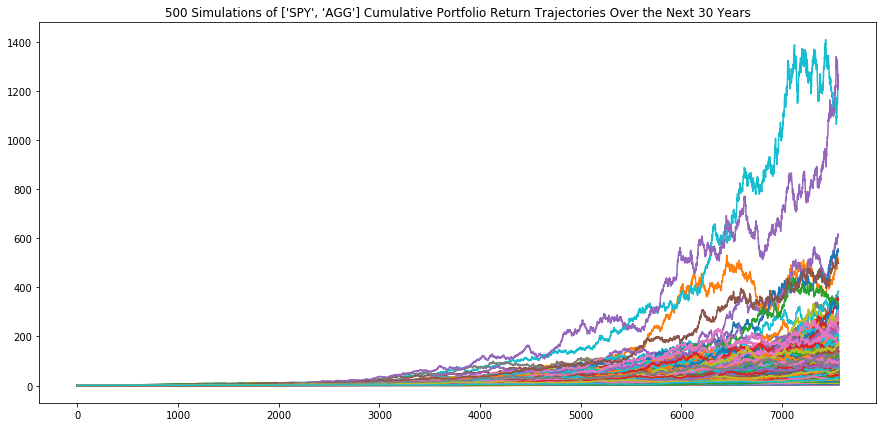

In [22]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{number_simulations} Simulations of {list_of_tickers} Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(figsize=(15,7), legend = None, title = plot_title)

In [23]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0     29.558604
1     51.284612
2     12.193363
3     34.809746
4    132.447287
Name: 7560, dtype: float64

In [24]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
portfolio_cumulative_returns.iloc[252*20,:]

0      18.239023
1      34.878674
2       5.649545
3       6.671368
4      41.390160
         ...    
495    87.487736
496    13.900760
497    29.955532
498    14.483371
499     6.837305
Name: 5041, Length: 500, dtype: float64

In [25]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q = [0.05, 0.95])
confidence_interval

0.05      6.501676
0.95    226.941795
Name: 7560, dtype: float64

In [26]:
confidence_interval.iloc[0]

6.501675833773747

In [27]:
confidence_interval.iloc[1]

226.94179526368958

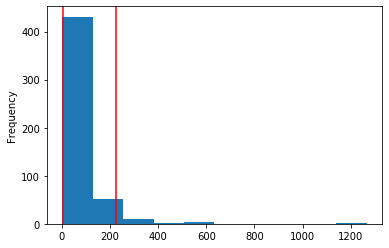

In [28]:
# Visualize the distribution of the ending returns
plt.figure()
ending_cumulative_returns.plot.hist(50)
plt.axvline(confidence_interval.iloc[0], color = 'r')
plt.axvline(confidence_interval.iloc[1], color = 'r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [29]:
# YOUR CODE HERE
confidence_intervals = ending_cumulative_returns.quantile(q = [0.1 ,0.5, 0.90]).to_frame()
display(confidence_intervals)
print("Expected cumulative return at 30 years for the 10th percetile is {:.2f}".format(confidence_intervals.iloc[0,0]))
print("Expected cumulative return at 30 years for the 50th percetile is {:.2f}".format(confidence_intervals.iloc[1,0]))
print("Expected cumulative return at 30 years for the 90th percetile is {:.2f}".format(confidence_intervals.iloc[2,0]))

,7560
0.1,11.128638
0.5,43.781493
0.9,155.179169


Expected cumulative return at 30 years for the 10th percetile is 11.13
Expected cumulative return at 30 years for the 50th percetile is 43.78
Expected cumulative return at 30 years for the 90th percetile is 155.18


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [30]:
# YOUR CODE HERE
initial_investment = 20000
expected_portfolio_return = round(initial_investment * confidence_intervals,2)
display(expected_portfolio_return)
print(f"Expected portfolio return at the 10th percentile is ${expected_portfolio_return.iloc[0,0]}")
print(f"Expected portfolio return at the 50th percentile is ${expected_portfolio_return.iloc[1,0]}")
print(f"Expected portfolio return at the 90th percentile is ${expected_portfolio_return.iloc[2,0]}")

,7560
0.1,222572.76
0.5,875629.86
0.9,3103583.38


Expected portfolio return at the 10th percentile is $222572.76
Expected portfolio return at the 50th percentile is $875629.86
Expected portfolio return at the 90th percentile is $3103583.38


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [31]:
projected_annual_income = 7389.00
retirement_income = round(.04 * expected_portfolio_return.iloc[0,0],2)
print(f"The current projected annual income from the Plaid analysis is ${projected_annual_income},\n"
      f"The current projected retirement income is ${retirement_income}")

if projected_annual_income == retirement_income:
    print('The projected retirement income meets the projected annual income.')
elif projected_annual_income <= retirement_income:
    print('The projected retirement income exceeds the projected annual income.')
else:
    print('The projected retirement income is not sufficient.')

The current projected annual income from the Plaid analysis is $7389.0,
The current projected retirement income is $8902.91
The projected retirement income exceeds the projected annual income.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [32]:
initial_investment_increased = 1.5 * initial_investment
expected_portfolio_return = round(initial_investment_increased * confidence_intervals,2)
changed_retirement_income = .04 * expected_portfolio_return.iloc[0,0] - retirement_income
print('Expected portfolio returns')
display(expected_portfolio_return)
print(f"A 50% increase in initial investment amount increases the projected retirement income by ${round(changed_retirement_income,2)}")

Expected portfolio returns


,7560
0.1,333859.14
0.5,1313444.79
0.9,4655375.07


A 50% increase in initial investment amount increases the projected retirement income by $4451.46


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [33]:
projected_returns = portfolio_cumulative_returns.quantile([0.05,0.50, 0.95], axis = 1).T
projected_returns.head()

,0.05,0.50,0.95
1,0.980088,1.001347,1.022250
2,0.971225,1.001765,1.032151
3,0.969389,1.003536,1.037181
4,0.963121,1.004461,1.042440
5,0.961372,1.003089,1.049449


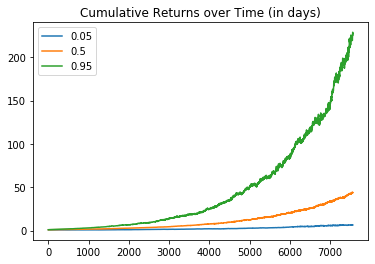

In [34]:
projected_returns.plot(title="Cumulative Returns over Time (in days)")